In [1]:
import pandas as pd
import pandas_ta as ta
import json
from math import floor
from datetime import datetime

In [2]:
candles = json.loads(open("./dataset5M.json").read())
dates = [datetime.fromtimestamp(c[0]/1000) for c in candles]
df_15m = pd.DataFrame([c[1:] for c in candles[:-1]], index=dates[:-1], columns=["open", "high", "low", "close", "volume"])
candles = json.loads(open("./dataset1M.json").read())
dates = [datetime.fromtimestamp(c[0]/1000) for c in candles]
df_1m = pd.DataFrame([c[1:] for c in candles[:-1]], index=dates[:-1], columns=["open", "high", "low", "close", "volume"])

In [3]:
df_15m["TREND"] = df_15m.ta.ttm_trend() 
df_15m["EMA50"] = df_15m.ta.ema(50) 
df_15m["EMA100"] = df_15m.ta.ema(100) 
df_15m["EMA150"] = df_15m.ta.ema(150) 
df_15m["RSI"] = df_15m.ta.rsi(14)
df_1m = df_1m[df_15m.index[1]:df_15m.index[-1]]
df_1m["TREND"] = df_1m.ta.ttm_trend()
df_1m["15M_TREND"] = [df_15m["TREND"][floor(x/5)] for x in range(len(df_1m))]
df_1m["15M_RSI"] = [df_15m["RSI"][floor(x/5)] for x in range(len(df_1m))]
df = df_1m.dropna()

In [4]:
sig = [1 if df["TREND"][i] == -1 and df["15M_TREND"][i] == -1 and df["15M_RSI"][i] > 30
            else 0 for i in range(len(df["close"]))]

In [7]:
buy = False
winRate = []
wallet = [100]
saveWallet = [0]
top = 0
for i in range(len(sig)):
    if df["TREND"][i] == -1 and df["15M_TREND"][i] == -1 and not buy:
        buy = df["close"][i]
        top = df["close"][i]
    elif buy and df["close"][i] <= (buy + (buy * 0.01)):
        winRate.append(0)
        wallet.append(wallet[-1] + (wallet[-1] * ((df["close"][i] - buy)/buy) * 1))
        buy = False
    elif buy and df["close"][i] >= (buy - (buy * 0.01)):
        winRate.append(1)
        wallet.append(wallet[-1] + (wallet[-1] * ((df["close"][i] - buy)/buy) * 1))
        buy = False
print("{}%".format(round((sum(winRate) / len(winRate)) * 100, 2)))

48.91%


<AxesSubplot:>

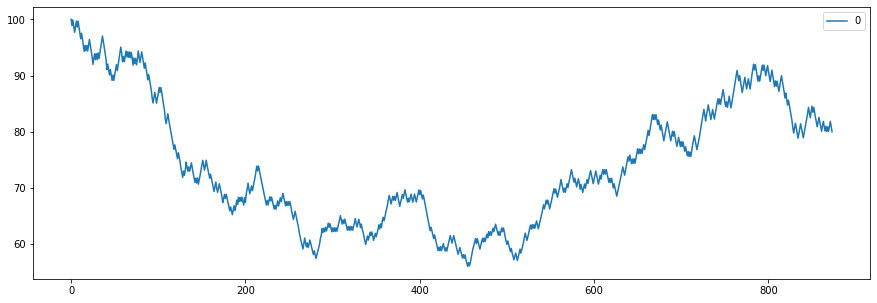

In [8]:
pd.DataFrame(wallet).plot(figsize=(15, 5))